In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class simp_1_NN:
    def __init__(self,A):
        self.A = A;
        
    ## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # 1.
    ##
    ## this first step is to load data!
    
    def Load_data(self, data):
        #self.A = A; ## for the distance
        #self.dimension = len(data[0,:]) -1;
        self.Xtrain = data[:, :-1];
        self.Y = data[:,-1];
    
    # 2.
    def M_distance(self, x1, x2):
        x = x1 - x2;
        
        ## A is a diagonal matrix
        ## all the variables are np.array
        
        return ((x.T).dot(self.A.dot(x)))**0.5;
    
    # 3. this function call 2
    def ArgMin(self, Xtest):
        ## because 1NN is a lazy learning
        ## so we don't have actually train this model
        
        N = len(self.Xtrain);
        d0 = self.M_distance(Xtest,self.Xtrain[0,:]);
        ind = 0;
        
        for i in range(1,N):
            current_d = self.M_distance(Xtest,self.Xtrain[i,:]);
            if d0 > current_d:
                d0 = current_d;
                ind = i;                
        return ind;
    # 4. this function call 3
    def Forward(self,X_test):        
        N = len(X_test);
        Pred = np.zeros((N,1));
        
        for i in range(N):
            ind = self.ArgMin(X_test[i]);
            Pred[i] = self.Y[ind];
            
        return np.column_stack((X_test,Pred));
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # this for test set
    def classification_rate(self, Y1, Y2):
        return np.mean(Y1 == Y2);
    
    def Test(self, test_data):
        X_test = test_data[:,:-1];
        Y_test = test_data[:,-1];
        N = len(X_test);
        
        Pred = self.Forward(X_test)[:,-1];        
        return self.classification_rate(Y_test, Pred);
    
    def Cross_validation(self,data,N):        
        n_data = len(data);
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        # this could be a float but remember to Int it later! 
        # a float can make sure it will fully use all the data
        
        ratio = n_data/N ; ##choosing the length for each subset 
        section = [int(i * ratio) for i in range(N+1)]; ## to divide the dataset into N sections, we need N + 1 nodes including 0
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        np.random.shuffle(data); 
        error_rate = [0]* N;
        for i in range(N):
            test_data = data[section[i]:section[i+1],:];
            train_data = np.vstack((data[0:section[i], :], data[section[i+1]:n_data,:]));
                                    
            self.Load_data(train_data);## that is for training data            
                       
            error_rate[i] =1 - self.Test(test_data); 
            error_rate[i] = round(error_rate[i], 4)
        return [error_rate, np.mean(error_rate)];
        
        '''## the previous code is too complex!
        data_subset = [0] * N;
        for i in range(N):
            #data_subset[i] = data[int(i * section): min(int((i+1)*section), n_data),:] # cannot exceed
            #data_subset[i] = data[int(i * section): int((i+1)*section),:];
            data_subset[i] = data[section[i]:section[i+1], :];
        
        ##>>>>>>>>>>>>>>>>>>>>>>>.
        # N is the folds
        for i in range(N):
            empty = True;            
            test_data = data_subset[i];
            
            for j in range(N):
                if i != j:
                    if empty:
                        train_data = data_subset[j];
                        empty = False;
                    train_data = np.vstack((train_data, data_subset[j]));   
                       
            self.Load_data(train_data);## that is for training data            
                       
            classi_rate[i] = self.Test(test_data);            
        return [classi_rate, np.mean(classi_rate)];
        '''


## Q2.8

In [3]:
dataz = np.loadtxt('D2z.txt');
A28 = np.eye(len(dataz[0,:-1]));
ONN28 = simp_1_NN(A28);
ONN28.Load_data(dataz);


In [4]:
min_val = -2;
max_val = 2;
steplength = 0.1;
N = int((max_val - min_val)/steplength) +1;

line = np.linspace(min_val,max_val,N);
xx,yy = np.meshgrid(line,line);
Xgrid = np.vstack((xx.flatten(),yy.flatten())).T;

outz = ONN28.Forward(Xgrid);

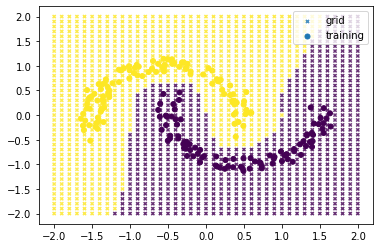

In [5]:
plt.figure();
plt.scatter(outz[:,0], outz[:,1], c = outz[:,2], marker = 'x', s = 10,alpha = 0.8, label = 'grid');
plt.scatter(dataz[:,0],dataz[:,1], c = dataz[:,2], marker = 'o', s = 25, linewidths=1, label = 'training');
plt.legend();

In [6]:
#ans = ONN28.Cross_validation(outz,7);
#print(ans)

## Q2.9

a).

In [7]:
data2a = np.loadtxt('D2a.txt');
A29 = np.eye(len(data2a[0,:-1]));
ONN29 = simp_1_NN(A29);

In [8]:
ans = ONN29.Cross_validation(data2a,5);
print(ans)

[[0.0, 0.0, 0.0, 0.0, 0.0], 0.0]


b).

In [9]:
## normalization
data2a_norm = np.zeros(data2a.shape);
data2a_norm[:,-1] = data2a[:,-1]

for i in range(len((data2a[0,:-1]))):
    avg = np.mean(data2a[:,i]);
    var = (data2a[:,i] - avg).dot((data2a[:,i] - avg)) / (len(data2a[:,i])-1);
    data2a_norm[:,i] = (data2a[:,i] - avg)/(var**0.5);
    
ans = ONN29.Cross_validation(data2a_norm,5);
print(ans)

[[0.0, 0.125, 0.075, 0.15, 0.025], 0.075]


c).  
The last two features are much larger than any of the first features. After normalization, these two features play less important roles in classifications.

## Q2.10

w/o normalization

In [10]:
data2b = np.loadtxt('D2b.txt');
A210 = np.eye(len(data2b[0,:-1]));
ONN210 = simp_1_NN(A210);

In [11]:
ans = ONN210.Cross_validation(data2b,5);
print(ans)

[[0.2, 0.1, 0.175, 0.225, 0.2], 0.18000000000000002]


w/ normalization

In [12]:
## normalization
data2b_norm = np.zeros(data2b.shape);
data2b_norm[:,-1] = data2b[:,-1];

for i in range(len((data2b[0,:-1]))):
    avg = np.mean(data2b[:,i]);
    var = (data2b[:,i] - avg).dot((data2b[:,i] - avg)) / (len(data2b[:,i])-1);
    
    data2b_norm[:,i] = (data2b[:,i] - avg)/(var**0.5);
    
ans = ONN210.Cross_validation(data2b_norm,5);
print(ans)

[[0.0, 0.0, 0.0, 0.0, 0.0], 0.0]


## Q2_11 & 12

In [13]:
'''
np.savetxt("WekaD2a.csv", data2a, delimiter=",");
np.savetxt("WekaD2a_norm.csv", data2a_norm, delimiter=",");
np.savetxt("WekaD2b.csv", data2b, delimiter=",");
np.savetxt("WekaD2b_norm.csv", data2b_norm, delimiter=",");

'''

'\nnp.savetxt("WekaD2a.csv", data2a, delimiter=",");\nnp.savetxt("WekaD2a_norm.csv", data2a_norm, delimiter=",");\nnp.savetxt("WekaD2b.csv", data2b, delimiter=",");\nnp.savetxt("WekaD2b_norm.csv", data2b_norm, delimiter=",");\n\n'

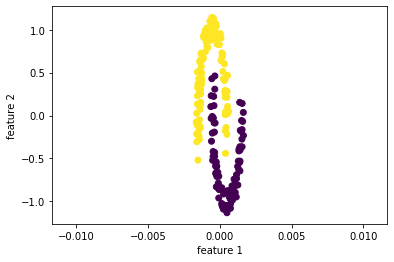

In [17]:
plt.figure();
plt.scatter(data2b[:,-3],data2b[:,-2], c= data2b[:,-1]);
plt.xlabel("feature 1");
plt.ylabel("feature 2");

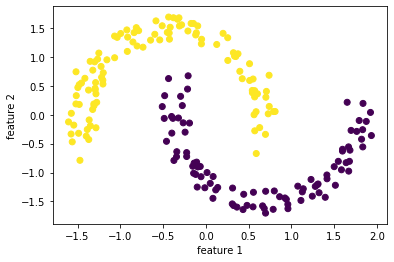

In [18]:
plt.figure();
plt.scatter(data2b_norm[:,-3],data2b_norm[:,-2], c= data2b_norm[:,-1]);
plt.xlabel("feature 1");
plt.ylabel("feature 2");

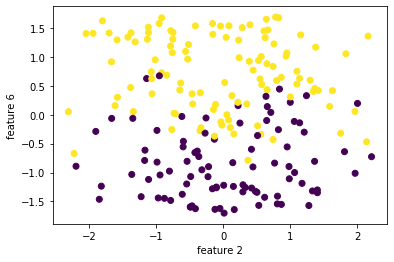

In [16]:
plt.figure();
plt.scatter(data2a_norm[:,1],data2a_norm[:,-2], c= data2a_norm[:,-1]);
plt.xlabel("feature 2");
plt.ylabel("feature 6");